# Scikit-learn provides many useful utilities for examining performance of MVA applications

Look at some examples for classifiers and regressors


# ROC curve for classifiers (e.g., BDT)

Remember, ROC curve examines rate of true positives vs false positive rate (signal efficiency vs background efficiency)
Ideally we want false positive rate = 0 (100% background rejection)  and true positive rate = 1 

Use a simple data set with 3 features and two class (0 or 1) as example

In [226]:
# Load libraries
import numpy as np
import matplotlib.pyplot as plt

from sklearn.ensemble import AdaBoostClassifier

# Import train_test_split function
from sklearn.model_selection import train_test_split
#Import scikit-learn metrics module for accuracy calculation
from sklearn import metrics

__Load a dataset for classification__

In [227]:
import pandas as pd

data = pd.read_csv("../Data/classifier_data.txt")
print(data)

          x1      x2     x3  Class
0     -0.161 -2.2600  0.331      0
1     -0.624 -0.2040 -0.984      1
2     -0.594  0.6280 -0.714      0
3     -1.010 -0.5690  0.803      1
4     -1.640  4.4100  0.940      0
...      ...     ...    ...    ...
19995 -1.930  0.0453 -0.512      1
19996  2.600 -1.7000 -0.788      0
19997  0.286 -4.2900  1.830      1
19998 -0.349 -0.5870  1.160      0
19999 -0.440 -2.5900  0.592      1

[20000 rows x 4 columns]


Text(0, 0.5, 'Feature x3')

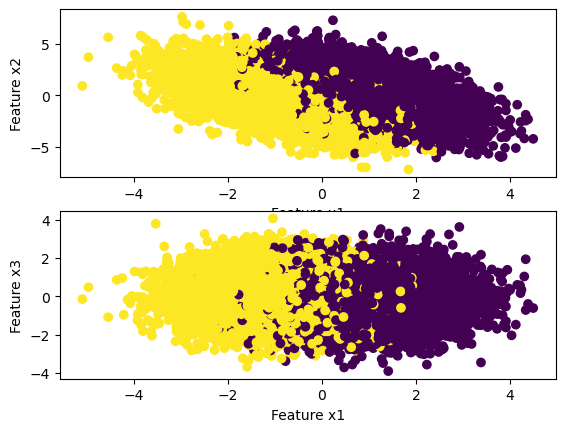

In [228]:
# Make a 2D array with the 3 object features, x1, x2, x3
x1 = np.array(data["x1"])
x2 = np.array(data["x2"])
x3 = np.array(data["x3"])
X = np.empty((len(x1),3))
for i in range(len(x1)):
    X[i] = [x1[i],x2[i],x3[i]]

# Make a 1D array with the object class
y = np.array(data["Class"])

# Plot the data (feature x1 vs x2)
fig, ax = plt.subplots(2,1)
ax[0].scatter(data["x1"], data["x2"],c=data["Class"])
ax[0].set_xlabel("Feature x1")
ax[0].set_ylabel("Feature x2")

ax[1].scatter(data["x1"], data["x3"],c=data["Class"])
ax[1].set_xlabel("Feature x1")
ax[1].set_ylabel("Feature x3")

In [229]:
# Split dataset into training set and test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.5) # 70% training and 30% test

In [230]:
# Create adaboost classifer object
abc = AdaBoostClassifier(n_estimators=500,
                         learning_rate=1)
# Train Adaboost Classifer
abc_model = abc.fit(X_train, y_train)



In [231]:
#Predict the response for test dataset
y_pred = abc_model.predict(X_test)

# Model Accuracy, how often is the classifier correct?
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))
print(y_test)
print(y_pred)

Accuracy: 0.8967
[0 0 1 ... 1 0 1]
[0 0 1 ... 1 0 1]


In [232]:
# it is interesting to see which classes the BDT confuses
# we can look at the "confusion matrix"

print(metrics.confusion_matrix(y_test, y_pred))

[[4499  472]
 [ 561 4468]]


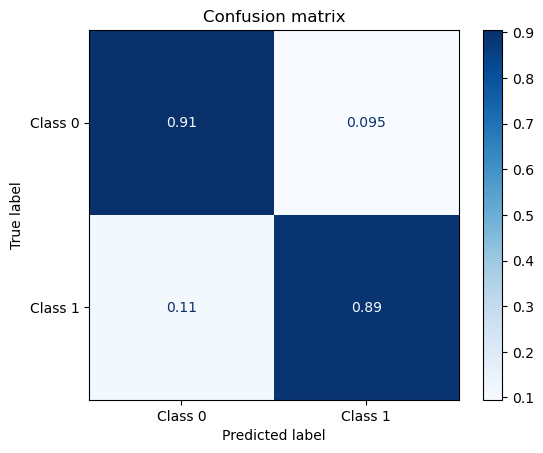

In [233]:
# may be more interesting to see this graphically

from sklearn.metrics import ConfusionMatrixDisplay

disp = ConfusionMatrixDisplay.from_estimator(
        abc,
        X_test,
        y_test,
        display_labels=["Class 0", "Class 1"],
        cmap=plt.cm.Blues,
        normalize="true",
    )
disp.ax_.set_title("Confusion matrix")
plt.show()


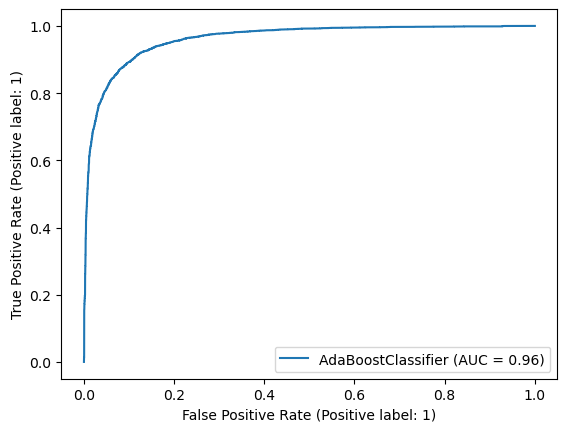

In [234]:
# import the RocCurveDisplay
from sklearn.metrics import RocCurveDisplay

abc_roc = RocCurveDisplay.from_estimator(abc, X_test, y_test)
plt.show()

Training MLP Classifier...
done


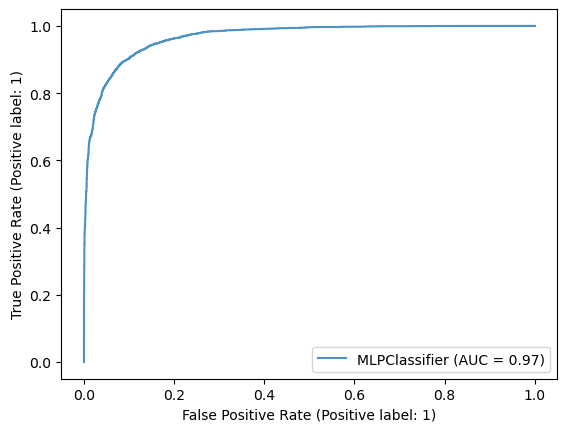

In [235]:
#Import scikit-learn MLP classifier
from sklearn.neural_network import MLPClassifier

mlp = MLPClassifier(solver='adam', hidden_layer_sizes=(15, 5), max_iter=10000)

# Train MLP Classifer
print("Training MLP Classifier...")
model = mlp.fit(X_train, y_train)
print("done")
mlp_roc = RocCurveDisplay.from_estimator(mlp, X_test, y_test, alpha=0.8)

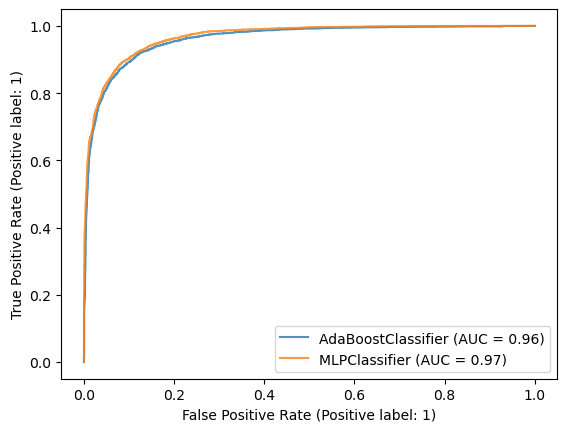

In [236]:
#plot two ROC curves on top of each other
fig,ax = plt.subplots()
abc_roc.plot(ax=ax, alpha=0.8)
mlp_roc.plot(ax=ax, alpha=0.8)

plt.show()

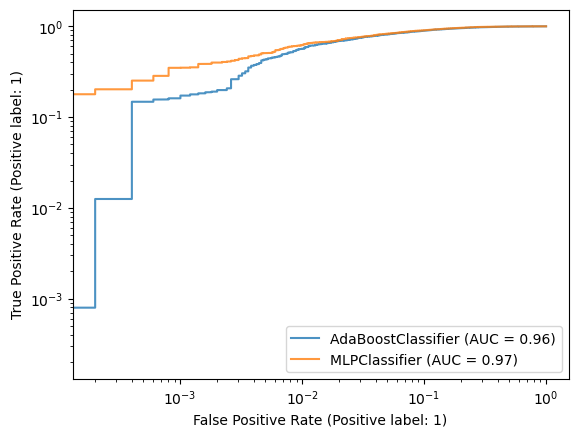

In [237]:
#plot two ROC curves on top of each other, but on a log scale
fig,ax = plt.subplots()
abc_roc.plot(ax=ax, alpha=0.8)
mlp_roc.plot(ax=ax, alpha=0.8)
ax.set_yscale("log")
ax.set_xscale("log")
plt.show()

In [238]:
# How to look at decision boundaries

In [239]:
X2 = X[:,[0,1]]
print(X2)

[[-0.161 -2.26 ]
 [-0.624 -0.204]
 [-0.594  0.628]
 ...
 [ 0.286 -4.29 ]
 [-0.349 -0.587]
 [-0.44  -2.59 ]]


[[-0.161 -2.26 ]
 [-0.624 -0.204]
 [-0.594  0.628]
 ...
 [ 0.286 -4.29 ]
 [-0.349 -0.587]
 [-0.44  -2.59 ]]


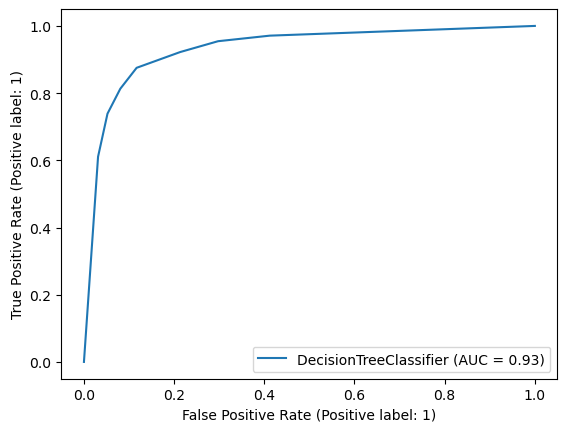

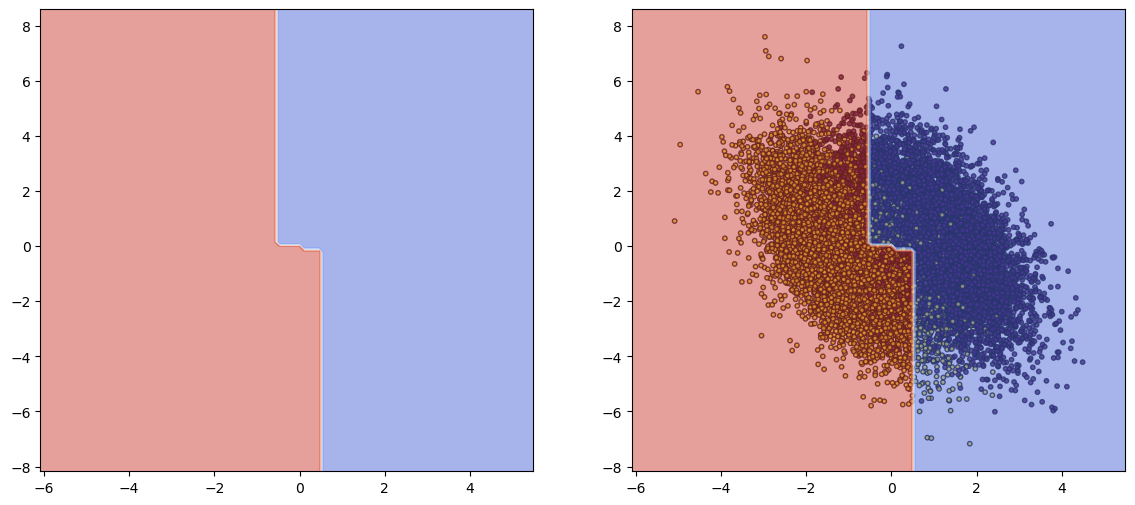

In [240]:
from sklearn.inspection import DecisionBoundaryDisplay
from sklearn.tree import DecisionTreeClassifier

# we are going to use only the x1 and x2 features

X2 = X[:,[0,1]]
print(X2)

# split into training and test dataset
X_train, X_test, y_train, y_test = train_test_split(X2, y, test_size=0.5) # 70% training and 30% test

# make a simple decision tree classifier (not a BDT)

clf = DecisionTreeClassifier(max_depth = 3)

# train the classifier
clf.fit(X_train, y_train)

# get decision tree prediction:
y_pred = clf.predict(X2)

#plot the ROC curve

clf_roc = RocCurveDisplay.from_estimator(clf, X_test, y_test)
plt.show()

fig,ax = plt.subplots(1,2,figsize=(14,6))
disp = DecisionBoundaryDisplay.from_estimator(clf,  X2, cmap=plt.cm.coolwarm, \
                                              response_method="predict",ax = ax[0], alpha=0.5)
plt.scatter(x1,x2,c=data["Class"],alpha = 0.8,s=10, edgecolor="k")
disp = DecisionBoundaryDisplay.from_estimator(clf,  X2, cmap=plt.cm.coolwarm, \
                                              response_method="predict",ax = ax[1], alpha=0.5)


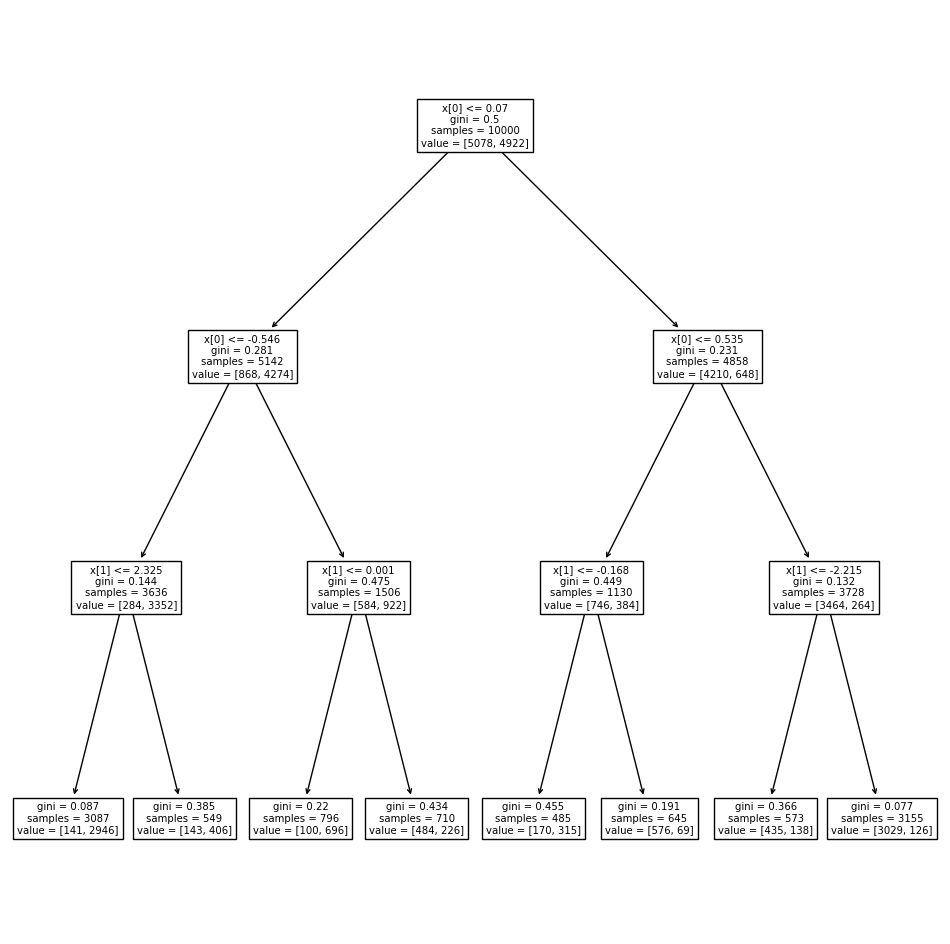

In [241]:
# we can also look at the decision tree

from sklearn import tree

plt.figure(figsize = (12,12))
tree.plot_tree(clf)
plt.show()


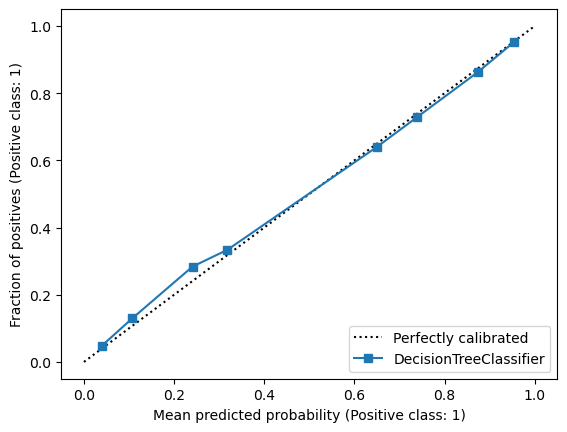

In [242]:
# another interesting diagnostic is the calibration display
# the classifier returns a probability for each object to the in a certain class
# how close is that probability to the actual fraction classified correctly?

from sklearn.calibration import CalibrationDisplay

display = CalibrationDisplay.from_estimator(
        clf,
        X_test,
        y_test,
        n_bins=10
    )
plt.show()